## Marketing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
marketing=pd.read_csv('Marketing_train.csv')
marketing.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


## Data Cleaning

**Checking for the unique values present in the categorical features**

In [3]:
for i in marketing.columns:
    if marketing[i].dtype==type(object):
        print(i,end=': ')
        print('\n',marketing[i].unique())
        print()

profession: 
 ['admin.' 'blue-collar' 'technician' 'management' 'services' 'unemployed'
 'housemaid' 'unknown' 'self-employed' 'retired' 'student' 'entrepreneur']

marital: 
 ['single' 'married' 'divorced' 'unknown']

schooling: 
 ['university.degree' nan 'high.school' 'basic.4y' 'basic.9y'
 'professional.course' 'basic.6y' 'unknown' 'illiterate']

default: 
 ['unknown' 'no' 'yes']

housing: 
 ['no' 'yes' 'unknown']

loan: 
 ['no' 'yes' 'unknown']

contact: 
 ['cellular' 'telephone']

month: 
 ['nov' 'jul' 'may' 'aug' 'apr' 'jun' 'mar' 'oct' 'sep' 'dec']

day_of_week: 
 ['mon' 'wed' 'tue' 'fri' 'thu' nan]

poutcome: 
 ['nonexistent' 'failure' 'success']

responded: 
 ['no' 'yes']



**re-read the data with na_values=unknown**

In [4]:
marketing=pd.read_csv('Marketing_train.csv',na_values='unknown')
marketing.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,NaN,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,NaN,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


## Exploratory data Analysis

### Basic data Analysis

**shape of data**

In [5]:
marketing.shape

(7414, 22)

**data info**


In [6]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
custAge           5610 non-null float64
profession        7353 non-null object
marital           7406 non-null object
schooling         5028 non-null object
default           5982 non-null object
housing           7246 non-null object
loan              7246 non-null object
contact           7414 non-null object
month             7414 non-null object
day_of_week       6703 non-null object
campaign          7414 non-null int64
pdays             7414 non-null int64
previous          7414 non-null int64
poutcome          7414 non-null object
emp.var.rate      7414 non-null float64
cons.price.idx    7414 non-null float64
cons.conf.idx     7414 non-null float64
euribor3m         7414 non-null float64
nr.employed       7414 non-null float64
pmonths           7414 non-null float64
pastEmail         7414 non-null int64
responded         7414 non-null object
dtypes: float64(7), int64(4), ob

**Descriptive Statistics**

In [7]:
marketing.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,5610.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000
mean,40.009804,2.518344,960.024548,0.184111,0.052091,93.570708,-40.561316,3.583141,5165.224251,959.797028,0.361883
std,10.574616,2.695055,192.845029,0.516775,1.568399,0.578345,4.649800,1.744865,73.108669,193.969418,1.261668
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,18.000000


### Missing Value Anlaysis

In [8]:
marketing.isnull().sum()

custAge           1804
profession          61
marital              8
schooling         2386
default           1432
housing            168
loan               168
contact              0
month                0
day_of_week        711
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

In [9]:
marketing.isnull().sum()/len(marketing)*100

custAge           24.332344
profession         0.822768
marital            0.107904
schooling         32.182358
default           19.314810
housing            2.265983
loan               2.265983
contact            0.000000
month              0.000000
day_of_week        9.589965
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
pmonths            0.000000
pastEmail          0.000000
responded          0.000000
dtype: float64

#### Imputaion of missing values

In [10]:
# Mean Imputation Missing Values for Numeric Variables
marketing["custAge"] = marketing["custAge"].fillna(marketing["custAge"].mean())

# Mode Imputation of Missing Values for Categorical Variables
marketing["schooling"] = marketing["schooling"].fillna(marketing["schooling"].mode()[0])
marketing["day_of_week"] = marketing["day_of_week"].fillna(marketing["day_of_week"].mode()[0])
marketing["default"] = marketing["default"].fillna(marketing["default"].mode()[0])
marketing["loan"] = marketing["loan"].fillna(marketing["loan"].mode()[0])
marketing["profession"] = marketing["profession"].fillna(marketing["profession"].mode()[0])
marketing["housing"] = marketing["housing"].fillna(marketing["housing"].mode()[0])
marketing["marital"] = marketing["marital"].fillna(marketing["marital"].mode()[0])

# Checking the count of missing values
marketing.isnull().sum()


custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

### Univariate Analysis 

#### Target Variable

In [11]:
marketing['responded'].value_counts()

no     6574
yes     840
Name: responded, dtype: int64

In [12]:
marketing['responded'].value_counts(normalize=True)#percentage

no     0.886701
yes    0.113299
Name: responded, dtype: float64

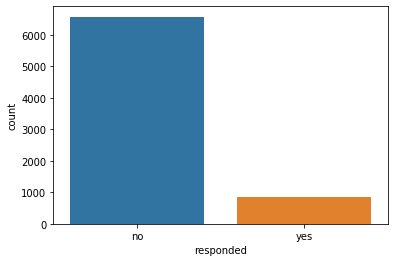

In [13]:
sns.countplot(marketing['responded'])

### Outlier Analysis

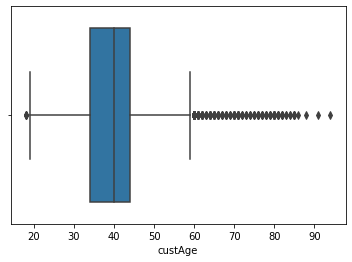

In [14]:
sns.boxplot(marketing['custAge'])

**Outliers exist in the variable custAge.Also the median age of customers in the dataset is 40.majority of the customets in data lie in the range of age group of 35+ to 45yrs**

**Droping outliers may lead to loss of data**

In [15]:
#count of outliers
marketing[marketing['custAge']>60]['custAge'].count()

141

**PLotting a histogram for variable custage**

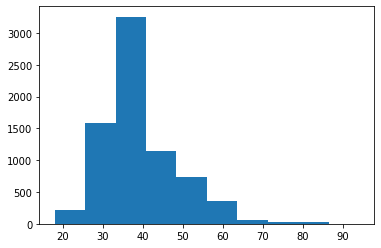

In [16]:
ax=plt.hist(marketing['custAge'],bins=10)

### Bivariate analysis

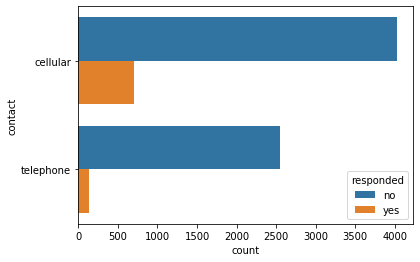

In [17]:
#checking how many responded when the contact was cellular
sns.countplot(y=marketing['contact'],hue=marketing['responded'])

**Checking how loan is affeting the target**

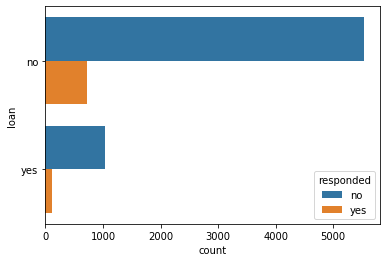

In [18]:
sns.countplot(y=marketing['loan'],hue=marketing['responded'])

**People who dont have loan have responded yes**

**Checking how some columns are affecting the target**

### Correlation

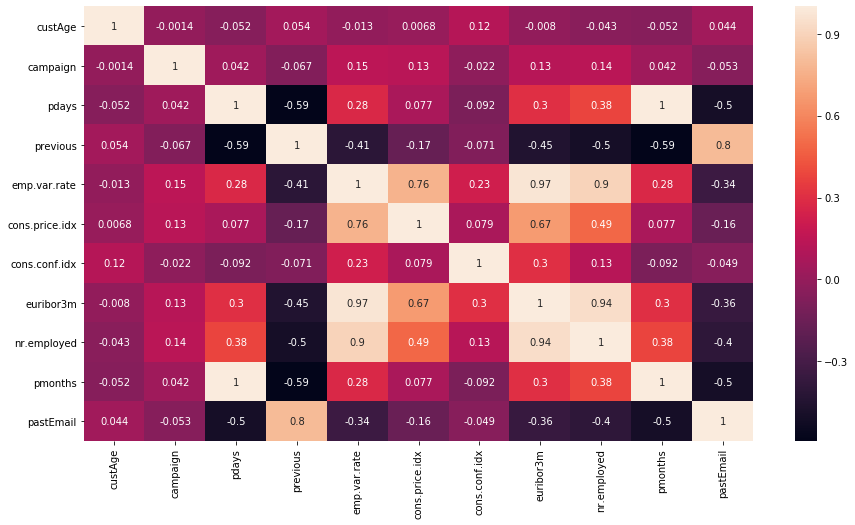

In [19]:
corr=marketing.corr()
plt.figure(figsize=(15,8))
ax=sns.heatmap(corr,annot=True)

### Encoding the categorical variables

In [20]:
# columns to perform label encoding
cols_to_le=['profession','marital','schooling','contact','month','day_of_week','poutcome','responded']
#LAbel encode categorical
le=LabelEncoder()
for column in cols_to_le:
    marketing[column]=le.fit_transform(marketing[column])
marketing.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,no,no,no,0,7,1,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,40.009804,1,1,6,no,no,no,0,3,1,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.000000,9,1,3,no,no,no,1,6,1,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.000000,4,0,6,no,yes,yes,0,3,4,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,40.009804,0,0,6,no,yes,no,0,6,3,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0


**One hot encoding**

In [21]:
#!pip install category_encoders

In [22]:
cols_to_ohe=['default','housing','loan']
#perform one hot encoding
import category_encoders as ce
ce_ohe=ce.OneHotEncoder(cols=cols_to_ohe)
marketing=ce_ohe.fit_transform(marketing)
marketing.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,1,0,1,0,1,0,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,40.009804,1,1,6,1,0,1,0,1,0,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.000000,9,1,3,1,0,1,0,1,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.000000,4,0,6,1,0,0,1,0,1,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,40.009804,0,0,6,1,0,0,1,1,0,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0


**dealing pdays and pmonths**

In [23]:
#pdays has 999
# it is too high value and impact the analysis
marketing['pdays'].replace(999,-1,inplace=True)
marketing['pmonths'].replace(999,-1,inplace=True)
marketing.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,1,0,1,0,1,0,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,-1.0,0,0
1,40.009804,1,1,6,1,0,1,0,1,0,...,0,1,1.4,93.918,-42.7,4.960,5228.1,-1.0,0,0
2,42.000000,9,1,3,1,0,1,0,1,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,-1.0,0,0
3,55.000000,4,0,6,1,0,0,1,0,1,...,0,1,1.4,93.918,-42.7,4.962,5228.1,-1.0,0,0
4,40.009804,0,0,6,1,0,0,1,1,0,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,-1.0,1,0


## Model Building

### Splitting data

In [24]:
x=marketing.drop('responded',axis=1)
y=marketing['responded']

### Standardization on data

In [25]:
#store numerical col in seperate variable
cnames=['custAge','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','pmonths','pastEmail']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for col in cnames:
    x[col]=sc.fit_transform(x[col].values.reshape(-1,1))
x.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,1.629770e+00,0,2,6,1,0,1,0,1,0,...,-0.178638,-0.356294,1,-0.096978,-0.641025,-0.309429,0.348394,0.418252,-0.201061,-0.286848
1,7.725190e-16,1,1,6,1,0,1,0,1,0,...,-0.178638,-0.356294,1,0.859475,0.600533,-0.459983,0.789146,0.860089,-0.201061,-0.286848
2,2.163789e-01,9,1,3,1,0,1,0,1,0,...,-0.178638,-0.356294,1,0.668184,0.731952,0.895006,0.730111,0.352591,-0.201061,-0.286848
3,1.629770e+00,4,0,6,1,0,0,1,0,1,...,-0.178638,-0.356294,1,0.859475,0.600533,-0.459983,0.790292,0.860089,-0.201061,-0.286848
4,7.725190e-16,0,0,6,1,0,0,1,1,0,...,-0.178638,1.578915,0,-1.180959,-1.171886,-1.212754,-1.313738,-0.904526,-0.201061,0.505806


### Spitting for train & test

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Models

#### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
classifier_log=LogisticRegression()
model=classifier_log.fit(X_train,y_train)

C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
y_pred_log=classifier_log.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_log)*100)

91.43627781523938


#### Decisson Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree=DecisionTreeClassifier()
model=classifier_tree.fit(X_train,y_train)

In [31]:
y_pred_tree=classifier_tree.predict(X_test)

In [32]:
print(accuracy_score(y_test,y_pred_tree)*100)

83.81658799730276


#### Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier_forest=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
model=classifier_forest.fit(X_train,y_train)

In [34]:
y_pred_forest=classifier_forest.predict(X_test)

In [35]:
print(accuracy_score(y_test,y_pred_forest)*100)

90.22252191503709


#### ROC Curve

In [36]:
probs=classifier_forest.predict_proba(X_test)
probs

array([[0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.98, 0.02],
       [0.97, 0.03],
       [1.  , 0.  ]])

In [37]:
from sklearn import metrics
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under curve:',roc_auc)

Area under curve: 0.759500097162845


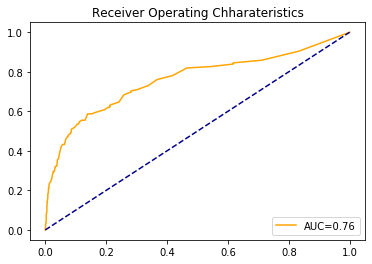

In [38]:
#plot roc 
plt.title('Receiver Operating Chharateristics')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel=('True Positive Rate')
plt.xlabel=('False Positive Rate')
plt.show()

## Class Imbalance

### K-Fold

In [39]:
x=x.to_numpy()
type(x)

numpy.ndarray

In [40]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)
scores=[]
# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(x, y):
    # select rows
    train_X, test_X = x[train_ix], x[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    model = classifier_forest.fit(train_X, train_y)
    predictions=classifier_forest.predict(test_X)
    scores.append(model.score(test_X,test_y))
    

print('Scores from each prediction:', scores)
print('\nAverage k-fold score:', np.mean(scores))   


Train: 0=5246, 1=685, Test: 0=1328, 1=155
Train: 0=5255, 1=676, Test: 0=1319, 1=164
Train: 0=5294, 1=637, Test: 0=1280, 1=203
Train: 0=5251, 1=680, Test: 0=1323, 1=160
Train: 0=5250, 1=682, Test: 0=1324, 1=158
Scores from each prediction: [0.9076196898179366, 0.8961564396493594, 0.8786244099797708, 0.8941335131490222, 0.8866396761133604]

Average k-fold score: 0.89263474574189


### Strified kfold

In [41]:
from sklearn.model_selection import StratifiedKFold

strata_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scores=[]
auc=[]

# enumerate the splits and summarize the distributions
for train_ix, test_ix in strata_kfold.split(x, y):
    # select rows
    train_X, test_X = x[train_ix], x[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    model = classifier_forest.fit(train_X, train_y)
    predictions=classifier_forest.predict(test_X)
    scores.append(model.score(test_X,test_y))
    
    #auc
    probs=classifier_forest.predict_proba(test_X)
    prob_positive=probs[:,1]
    fpr,tpr,threshold=metrics.roc_curve(test_y,prob_positive)
    roc_auc=metrics.auc(fpr,tpr)
    auc.append(roc_auc)
    

print('\nScores from each prediction:', scores)
print('\nAverage stratified k-fold score:', np.mean(scores))
print('\nAuc from each split:',auc)
print('\nAverage auc:', np.mean(auc))


Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84

Scores from each prediction: [0.898921832884097, 0.889487870619946, 0.8854447439353099, 0.898921832884097, 0.8879892037786775, 0.8852901484480432, 0.9055330634278003, 0.8987854251012146, 0.8906882591093117, 0.8947368421052632]

Average stratified k-fold score: 0.893579922229376

Auc from each split: [0.7662016934433347, 0.7584129396439427, 0.7041720943696628, 0.7085685337964974, 0.7759114300210191, 0.7695151119808654, 0.7995941146626078, 0.781256794955425, 0.7853609480321809, 0.7780767558164817]

Average auc: 0.7627070416722017


### Under Sampling(or Down Sampling)  &OverSampling(or Up Sampling)


In [42]:
print(marketing['responded'].value_counts())
df_majority=marketing[marketing.responded==0]
df_minority=marketing[marketing.responded==1]

0    6574
1     840
Name: responded, dtype: int64


In [43]:
import sklearn.utils as ut
#upsample minority class
df_minority_upsampled=ut.resample(df_minority,
                                 replace=True,  ##sample with replacement
                                 n_samples=6574, #to match majority class
                                 random_state=1)

In [44]:
##combine majority class with upsampled minority class
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [45]:
## Display new class counts
df_upsampled.responded.value_counts()

1    6574
0    6574
Name: responded, dtype: int64

In [46]:
df_upsampled.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,1,0,1,0,1,0,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,-1.0,0,0
1,40.009804,1,1,6,1,0,1,0,1,0,...,0,1,1.4,93.918,-42.7,4.960,5228.1,-1.0,0,0
2,42.000000,9,1,3,1,0,1,0,1,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,-1.0,0,0
3,55.000000,4,0,6,1,0,0,1,0,1,...,0,1,1.4,93.918,-42.7,4.962,5228.1,-1.0,0,0
4,40.009804,0,0,6,1,0,0,1,1,0,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,-1.0,1,0


In [47]:
df_upsampled.shape

(13148, 25)

#### spliting X and Y

In [48]:
X_upsampled=df_upsampled.drop('responded',axis=1)
Y_upsampled=df_upsampled['responded']

#### Standardization

In [49]:
#store numerical col in seperate variable
cnames=['custAge','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','pmonths','pastEmail']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for col in cnames:
    X_upsampled[col]=sc.fit_transform(X_upsampled[col].values.reshape(-1,1))
X_upsampled.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,1.377180,0,2,6,1,0,1,0,1,0,...,-0.325314,-0.453227,1,0.263351,-0.431335,-0.297790,0.690567,0.731752,-0.367893,-0.356188
1,-0.037966,1,1,6,1,0,1,0,1,0,...,-0.325314,-0.453227,1,1.141928,0.705235,-0.426537,1.098455,1.103462,-0.367893,-0.356188
2,0.149918,9,1,3,1,0,1,0,1,0,...,-0.325314,-0.453227,1,0.966213,0.825541,0.732185,1.043823,0.676513,-0.367893,-0.356188
3,1.377180,4,0,6,1,0,0,1,0,1,...,-0.325314,-0.453227,1,1.141928,0.705235,-0.426537,1.099516,1.103462,-0.367893,-0.356188
4,-0.037966,0,0,6,1,0,0,1,1,0,...,-0.325314,0.946264,0,-0.732371,-0.917306,-1.070271,-0.847633,-0.381078,-0.367893,0.213331


#### TEst train split

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_upsampled,Y_upsampled,test_size=0.2,random_state=0)

#### Logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression
classifier_log=LogisticRegression()
model=classifier_log.fit(X_train,y_train)

C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
y_pred_log=classifier_log.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_log)*100)

73.80228136882128


##### ROC Curve

In [54]:
probs=classifier_log.predict_proba(X_test)
probs

array([[0.17388605, 0.82611395],
       [0.8678567 , 0.1321433 ],
       [0.74267554, 0.25732446],
       ...,
       [0.65548701, 0.34451299],
       [0.72964282, 0.27035718],
       [0.13593665, 0.86406335]])

In [55]:
from sklearn import metrics
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under curve:',roc_auc)

Area under curve: 0.798923058403015


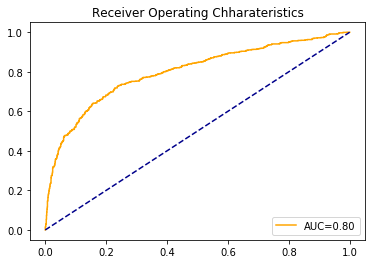

In [56]:
#plot roc 
plt.title('Receiver Operating Chharateristics')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel=('True Positive Rate')
plt.xlabel=('False Positive Rate')
plt.show()

#### Decission Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree=DecisionTreeClassifier()
model=classifier_tree.fit(X_train,y_train)

In [58]:
y_pred_tree=classifier_tree.predict(X_test)

In [59]:
print(accuracy_score(y_test,y_pred_tree)*100)

94.67680608365019


##### Roc Curve

In [60]:
probs=classifier_tree.predict_proba(X_test)
probs

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [61]:
from sklearn import metrics
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under curve:',roc_auc)

Area under curve: 0.9456664791510404


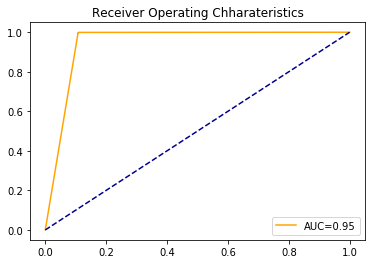

In [62]:
#plot roc 
plt.title('Receiver Operating Chharateristics')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel=('True Positive Rate')
plt.xlabel=('False Positive Rate')
plt.show()

#### Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
classifier_forest=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
model=classifier_forest.fit(X_train,y_train)

In [64]:
y_pred_forest=classifier_forest.predict(X_test)

In [65]:
print(accuracy_score(y_test,y_pred_forest)*100)

96.95817490494296


##### Roc Curve

In [66]:
probs=classifier_forest.predict_proba(X_test)
probs

array([[0.  , 1.  ],
       [0.97, 0.03],
       [0.03, 0.97],
       ...,
       [0.88, 0.12],
       [0.  , 1.  ],
       [0.  , 1.  ]])

In [67]:
from sklearn import metrics
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under curve:',roc_auc)

Area under curve: 0.9980085145984388


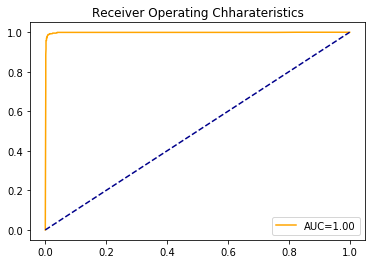

In [68]:
#plot roc 
plt.title('Receiver Operating Chharateristics')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel=('True Positive Rate')
plt.xlabel=('False Positive Rate')
plt.show()

#### Down Sampling

In [69]:
import sklearn.utils as ut
#upsample minority class
df_majority_downsampled=ut.resample(df_majority,
                                 replace=False,  ##sample with replacement
                                 n_samples=840, #to match majority class
                                 random_state=1)

In [70]:
df_downsampled=pd.concat([df_majority_downsampled,df_minority])
df_downsampled.responded.value_counts()

1    840
0    840
Name: responded, dtype: int64